In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Load the dataset
df = pd.read_csv("../data/diabetes_clean.csv")
df.head()

,BMI,HighBP,Age,Smoker,PhysActivity,Diabetes_binary
0,0.325581,1.0,0.666667,1.0,0.0,0.0
1,0.151163,0.0,0.500000,1.0,1.0,0.0
2,0.186047,1.0,0.666667,0.0,0.0,0.0
3,0.174419,1.0,0.833333,0.0,1.0,0.0
4,0.139535,1.0,0.833333,0.0,1.0,0.0


Compute BMI percentiles

In [ ]:

bmi_min = df["BMI"].min()
bmi_q1  = df["BMI"].quantile(0.25)   # Lower 25%
bmi_q2  = df["BMI"].quantile(0.50)   # Median
bmi_q3  = df["BMI"].quantile(0.75)   # Upper 25%
bmi_max = df["BMI"].max()

print("BMI Percentiles:")
print("Min =", bmi_min)
print("Q1  =", bmi_q1)
print("Q2  =", bmi_q2)
print("Q3  =", bmi_q3)
print("Max =", bmi_max)


BMI Percentiles:
Min = 0.0
Q1  = 0.1395348837209302
Q2  = 0.1744186046511628
Q3  = 0.2209302325581395
Max = 1.0


define BMI universe using real range of values

define good peak locations for the fuzzy sets

In [ ]:

bmi_universe = np.linspace(bmi_min, bmi_max, 101)
bmi_healthy_peak = (bmi_q1 + bmi_q2) / 2      
bmi_over_peak    = (bmi_q2 + bmi_q3) / 2      


BMI Fuzzy Sets (FIXED Hybrid/Percentile-Based)

In [ ]:

bmi_under = fuzz.trimf(bmi_universe, [bmi_min, bmi_min, bmi_q1])
bmi_healthy = fuzz.trimf(bmi_universe, [bmi_min, bmi_healthy_peak, bmi_q3])
bmi_over = fuzz.trimf(bmi_universe, [bmi_q1, bmi_over_peak, 0.4])
bmi_obese = fuzz.trapmf(bmi_universe, [bmi_q2, 0.4, 1.0, 1.0])

Plot BMI Membership Functions

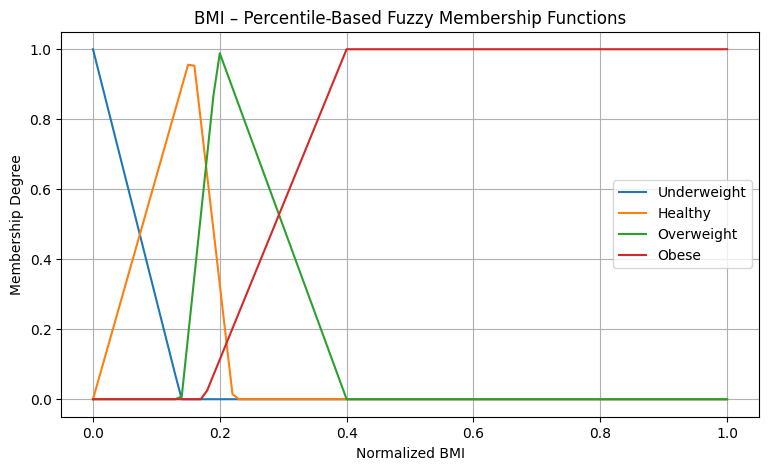

In [9]:
plt.figure(figsize=(9,5))
plt.plot(bmi_universe, bmi_under,   label='Underweight')
plt.plot(bmi_universe, bmi_healthy, label='Healthy')
plt.plot(bmi_universe, bmi_over,    label='Overweight')
plt.plot(bmi_universe, bmi_obese,   label='Obese')

plt.title("BMI – Percentile-Based Fuzzy Membership Functions")
plt.xlabel("Normalized BMI")
plt.ylabel("Membership Degree")
plt.grid(True)
plt.legend()
plt.show()


Compute AGE percentiles 

In [ ]:


age_min = df["Age"].min()
age_q1  = df["Age"].quantile(0.25)
age_q2  = df["Age"].quantile(0.50)
age_q3  = df["Age"].quantile(0.75)
age_max = df["Age"].max()

print("AGE Percentiles:")
print("Min =", age_min)
print("Q1  =", age_q1)
print("Q2  =", age_q2)
print("Q3  =", age_q3)
print("Max =", age_max)


AGE Percentiles:
Min = 0.0
Q1  = 0.4166666666666667
Q2  = 0.5833333333333333
Q3  = 0.7499999999999999
Max = 1.0


In [12]:
age_young_peak  = (age_min + age_q1) / 2
age_middle_peak = age_q2 
age_old_peak    = (age_q2 + age_q3) / 2


the universe definition

In [ ]:

age_universe = np.linspace(age_min, age_max, 101)
age_young = fuzz.trimf(age_universe, [age_min, age_min, age_q2])
age_middle = fuzz.trimf(age_universe, [age_q1, age_middle_peak, age_max * 0.7]) 
age_old = fuzz.trapmf(age_universe, [age_q3, age_max * 0.8, age_max, age_max])

Plot Age Membership Functions

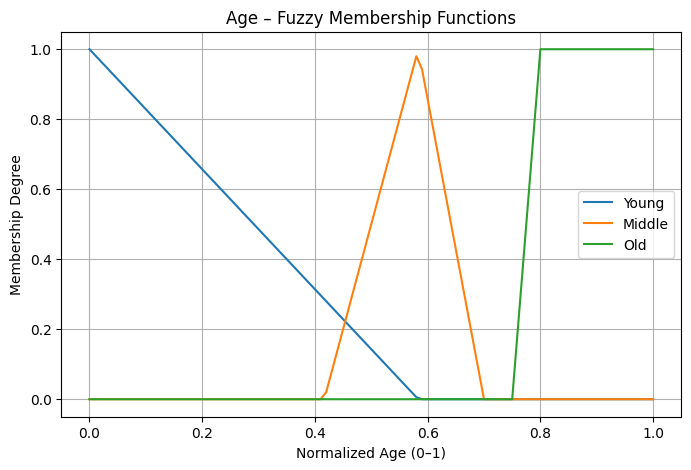

In [14]:
plt.figure(figsize=(8,5))
plt.plot(age_universe, age_young, label='Young')
plt.plot(age_universe, age_middle, label='Middle')
plt.plot(age_universe, age_old, label='Old')

plt.title("Age – Fuzzy Membership Functions")
plt.xlabel("Normalized Age (0–1)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()



 binary variables 

In [15]:
binary_universe = np.linspace(0, 1, 101)
# HighBP
bp_normal = fuzz.trimf(binary_universe, [0.0, 0.0, 0.6])
bp_high   = fuzz.trimf(binary_universe, [0.4, 1.0, 1.0])

# Smoker
smoke_no  = fuzz.trimf(binary_universe, [0.0, 0.0, 0.6])
smoke_yes = fuzz.trimf(binary_universe, [0.4, 1.0, 1.0])

# PhysActivity
act_inactive = fuzz.trimf(binary_universe, [0.0, 0.0, 0.6])
act_active   = fuzz.trimf(binary_universe, [0.4, 1.0, 1.0])


Plot HighBP Membership Functions

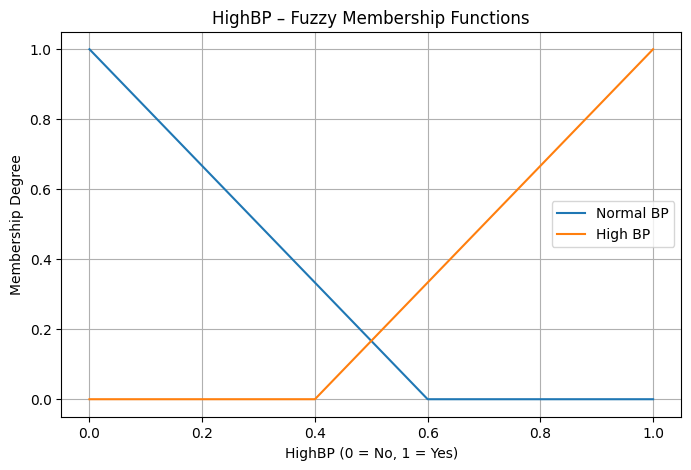

In [16]:
plt.figure(figsize=(8,5))
plt.plot(binary_universe, bp_normal, label='Normal BP')
plt.plot(binary_universe, bp_high, label='High BP')

plt.title("HighBP – Fuzzy Membership Functions")
plt.xlabel("HighBP (0 = No, 1 = Yes)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


Plot Smoker Membership Functions

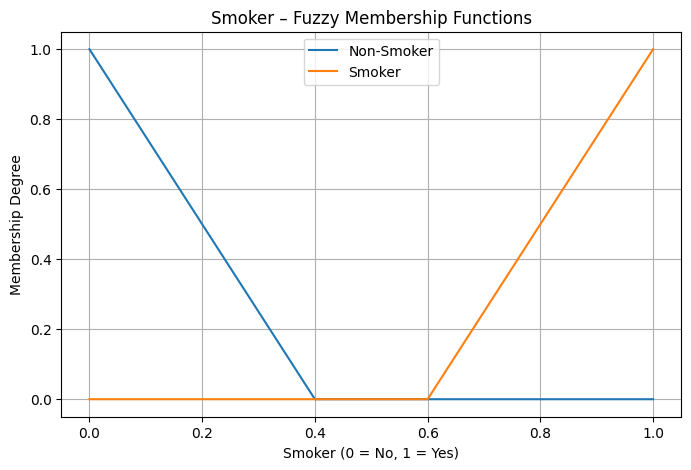

In [11]:
plt.figure(figsize=(8,5))
plt.plot(binary_universe, smoke_no, label='Non-Smoker')
plt.plot(binary_universe, smoke_yes, label='Smoker')

plt.title("Smoker – Fuzzy Membership Functions")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


Plot PhysActivity Membership Functions

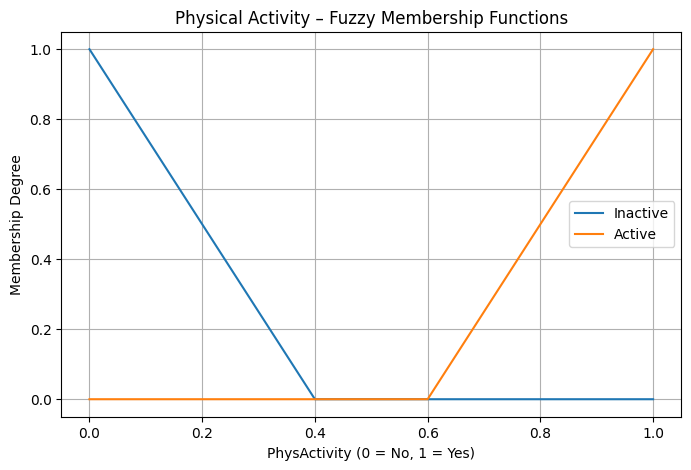

In [12]:
plt.figure(figsize=(8,5))
plt.plot(binary_universe, act_inactive, label='Inactive')
plt.plot(binary_universe, act_active, label='Active')

plt.title("Physical Activity – Fuzzy Membership Functions")
plt.xlabel("PhysActivity (0 = No, 1 = Yes)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


Plot Risk Output Membership Functions

In [3]:
# --- Risk Output Universe ---
risk_universe = np.linspace(0, 1, 101)

# Very Low Risk
risk_very_low = fuzz.trapmf(risk_universe, [0.0, 0.0, 0.1, 0.2])

# Low Risk
risk_low = fuzz.trimf(risk_universe, [0.1, 0.25, 0.4])

# Medium Risk
risk_medium = fuzz.trimf(risk_universe, [0.3, 0.5, 0.7])

# High Risk
risk_high = fuzz.trimf(risk_universe, [0.6, 0.75, 0.9])

# Very High Risk
risk_very_high = fuzz.trapmf(risk_universe, [0.8, 0.9, 1.0, 1.0])


In [4]:
plt.figure(figsize=(8,5))
plt.plot(risk_universe, risk_vlow, label='Very Low')
plt.plot(risk_universe, risk_low, label='Low')
plt.plot(risk_universe, risk_med, label='Medium')
plt.plot(risk_universe, risk_high, label='High')
plt.plot(risk_universe, risk_vhigh, label='Very High')

plt.title("Diabetes Risk – Fuzzy Output Membership Functions")
plt.xlabel("Risk (0–1)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


NameError: name 'risk_vlow' is not defined

<Figure size 800x500 with 0 Axes>